[State Data Revisited](https://ocw.mit.edu/courses/sloan-school-of-management/15-071-the-analytics-edge-spring-2017/trees/assignment-4/state-data-revisted/)

#### We will be revisiting the "state" dataset from one of the optional problems in Unit 2. This dataset has, for each of the fifty U.S. states, the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to, region the state belongs to, and two-letter abbreviation. This dataset comes from the U.S. Department of Commerce, Bureau of the Census.
#### Load the dataset into R and convert it to a data frame by running the following two commands in R:
#### data(state)
#### statedata = data.frame(state.x77)
#### If you can't access the state dataset in R, here is a CSV file with the same data that you can load into R using the read.csv function: statedataSimple (CSV).  Be sure to call the output of the read.csv function "statedata".
#### After you have loaded the data into R, inspect the data set using the command: str(statedata)
#### This dataset has 50 observations (one for each US state) and the following 8 variables:
- <font color='red'>Population - the population estimate of the state in 1975</font><br>
- <font color='red'>Income - per capita income in 1974</font><br>
- <font color='red'>Illiteracy - illiteracy rates in 1970, as a percent of the population</font><br>
- <font color='red'>Life.Exp - the life expectancy in years of residents of the state in 1970</font><br>
- <font color='red'>Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976</font><br>
- <font color='red'>HS.Grad - percent of high-school graduates in 1970</font><br>
- <font color='red'>Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state</font><br>
- <font color='red'>Area - the land area (in square miles) of the state</font><br>
#### We will try to build a model for life expectancy using regression trees, and employ cross-validation to improve our tree's performance.

In [1]:
data(state)
statedata = data.frame(state.x77)
str(statedata)

'data.frame':	50 obs. of  8 variables:
 $ Population: num  3615 365 2212 2110 21198 ...
 $ Income    : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy: num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp  : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder    : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad   : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost     : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area      : num  50708 566432 113417 51945 156361 ...


# Problem 1.1 - Linear Regression Models
#### Let's recreate the linear regression models we made in the previous homework question. First, predict Life.Exp using all of the other variables as the independent variables (Population, Income, Illiteracy, Murder, HS.Grad, Frost, Area ). Use the entire dataset to build the model.
#### What is the adjusted R-squared of the model?

In [2]:
modelLM <- lm(Life.Exp ~ ., data=statedata)
summary(modelLM)$adj.r.squared

[1] 0.6921823

# Problem 1.2 - Linear Regression Models
#### Calculate the sum of squared errors (SSE) between the predicted life expectancies using this model and the actual life expectancies:

In [3]:
(SSE  <- sum((modelLM$residuals)^2))

[1] 23.29714

# Problem 1.3 - Linear Regression Models
#### Build a second linear regression model using just Population, Murder, Frost, and HS.Grad as independent variables (the best 4 variable model from the previous homework). What is the adjusted R-squared for this model?

In [4]:
modelLM2  <- lm(Life.Exp ~ Population + Murder + Frost + HS.Grad, data = statedata)
summary(modelLM2)$adj.r.squared

[1] 0.712569

# Problem 1.4 - Linear Regression Models
#### Calculate the sum of squared errors again, using this reduced model:

In [5]:
(SSE <- sum((modelLM2$residuals)^2))

[1] 23.30804

# Problem 1.5 - Linear Regression Models
#### Which of the following is correct?
- <font color='red'>Trying different combinations of variables in linear regression is like trying different numbers of splits in a tree - this controls the complexity of the model.</font> # Correct <br>
- <font color='red'>Using many variables in a linear regression is always better than using just a few.</font><br>
- <font color='red'>The variables we removed were uncorrelated with Life.Exp</font><br>

# Problem 2.1 - CART Models
#### Let's now build a CART model to predict Life.Exp using all of the other variables as independent variables (Population, Income, Illiteracy, Murder, HS.Grad, Frost, Area). We'll use the default minbucket parameter, so don't add the minbucket argument. Remember that in this problem we are not as interested in predicting life expectancies for new observations as we are understanding how they relate to the other variables we have, so we'll use all of the data to build our model. You shouldn't use the method="class" argument since this is a regression tree.
#### Plot the tree. Which of these variables appear in the tree? Select all that apply.
- <font color='red'>Population</font><br>
- <font color='red'>Murder</font> # Correct <br>
- <font color='red'>Frost</font><br>
- <font color='red'>HS.Grad</font><br>
- <font color='red'>Area</font><br>

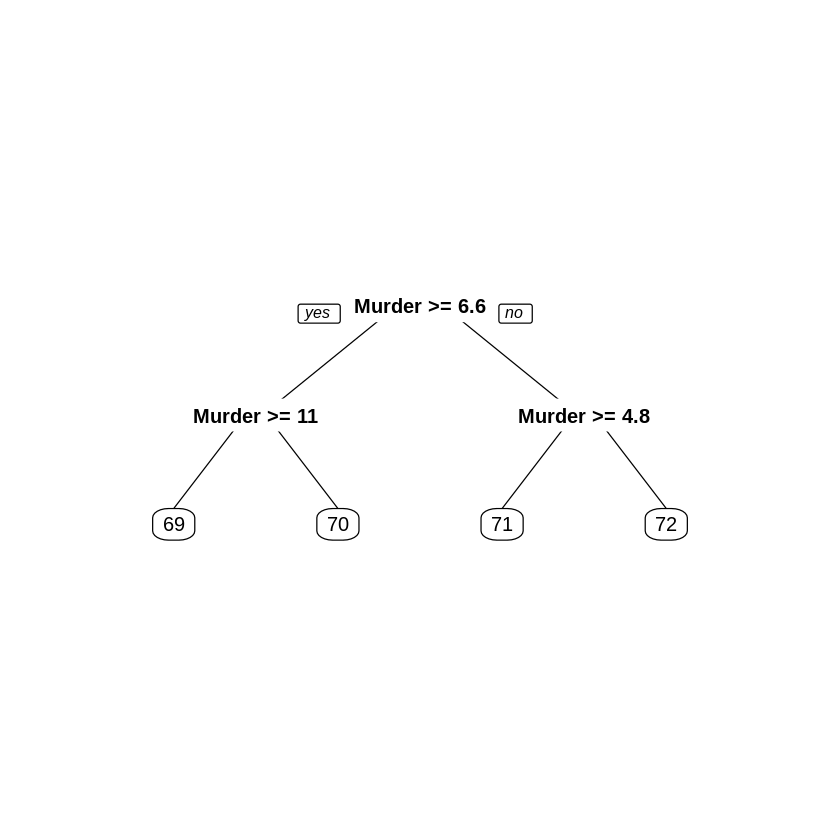

In [6]:
library(rpart)
library(rpart.plot)
modelCart <- rpart(Life.Exp ~ ., data = statedata)
prp(modelCart)

# Problem 2.2 - CART Models
#### Use the regression tree you just built to predict life expectancies (using the predict function), and calculate the sum-of-squared-errors (SSE) like you did for linear regression. What is the SSE?

In [7]:
cartPrediction <- predict(modelCart)
sum((cartPrediction - statedata$Life.Exp)^2)

[1] 28.99848

# Problem 2.3 - CART Models
#### The error is higher than for the linear regression models. One reason might be that we haven't made the tree big enough. Set the minbucket parameter to 5, and recreate the tree.
#### Which variables appear in this new tree? Select all that apply.
- <font color='red'>Population</font><br>
- <font color='red'>Murder</font> # Correct <br>
- <font color='red'>Frost</font><br>
- <font color='red'>HS.Grad</font> # Correct <br>
- <font color='red'>Area</font> # Correct <br>

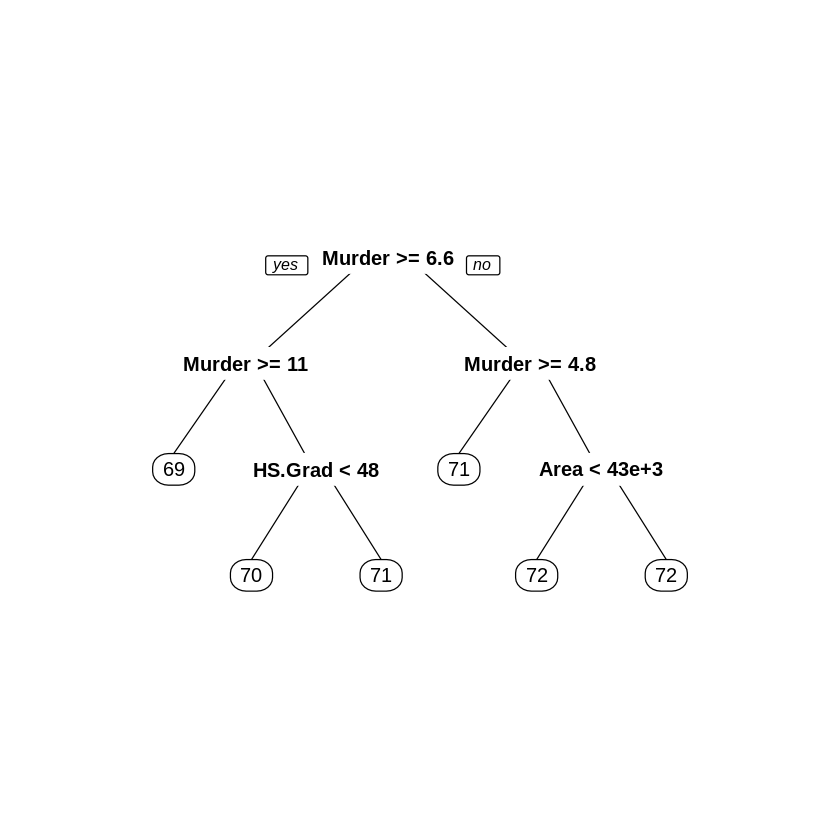

In [8]:
modelCart2 <- rpart(Life.Exp ~ ., data = statedata, minbucket=5)
prp(modelCart2)

# Problem 2.4 - CART Models
#### Do you think the default minbucket parameter is smaller or larger than 5 based on the tree that was built?
- <font color='red'>Smaller</font><br>
- <font color='red'>Larger</font> # Correct <br>

# Problem 2.5 - CART Models
#### What is the SSE of this tree?
#### This is much closer to the linear regression model's error. By changing the parameters we have improved the fit of our model.

In [9]:
predictionCart <-  predict(modelCart2)
sum((predictionCart - statedata$Life.Exp)^2)

[1] 23.64283

# Problem 2.6 - CART Models
#### Can we do even better? Create a tree that predicts Life.Exp using only Area, with the minbucket parameter to 1. What is the SSE of this newest tree?

In [10]:
modelCart3  <- rpart(Life.Exp ~ Area, data = statedata, minbucket=1)
predictonCart3 <- predict(modelCart3)
(SSE <- sum((predictonCart3 - statedata$Life.Exp)^2))

[1] 9.312442

# Problem 2.7 - CART Models
#### This is the lowest error we have seen so far. What would be the best interpretation of this result?
- <font color='red'>Trees are much better than linear regression for this problem because they can capture nonlinearities that linear regression misses.</font><br>
- <font color='red'>We can build almost perfect models given the right parameters, even if they violate our intuition of what a good model should be.</font> # Correct <br>
- <font color='red'>Area is obviously a very meaningful predictor of life expectancy, given we were able to get such low error using just Area as our independent variable.</font><br>

# Problem 3.1 - Cross-validation
#### Adjusting the variables included in a linear regression model is a form of model tuning. In Problem 1 we showed that by removing variables in our linear regression model (tuning the model), we were able to maintain the fit of the model while using a simpler model. A rule of thumb is that simpler models are more interpretable and generalizeable. We will now tune our regression tree to see if we can improve the fit of our tree while keeping it as simple as possible.
#### Load the caret library, and set the seed to 111. Set up the controls exactly like we did in the lecture (10-fold cross-validation) with cp varying over the range 0.01 to 0.50 in increments of 0.01. Use the train function to determine the best cp value for a CART model using all of the available independent variables, and the entire dataset statedata. What value of cp does the train function recommend? (Remember that the train function tells you to pick the largest value of cp with the lowest error when there are ties, and explains this at the bottom of the output.)

In [11]:
set.seed(111)
library(caret)
numFolds = trainControl( method = "cv", number = 10 )
cpGrid = expand.grid( .cp = seq(0.01,0.5,0.01)) 
train(Life.Exp ~ ., data = statedata, method = "rpart", 
      trControl = numFolds, tuneGrid = cpGrid)

Loading required package: lattice
Loading required package: ggplot2
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

CART 

50 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 46, 45, 44, 43, 46, 46, ... 
Resampling results across tuning parameters:

  cp    RMSE       Rsquared   MAE      
  0.01  1.1375138  0.4734757  0.9362281
  0.02  1.1375138  0.4734757  0.9362281
  0.03  1.1375138  0.4734757  0.9362281
  0.04  1.1231367  0.4734757  0.9286572
  0.05  1.0817092  0.4923520  0.8907357
  0.06  1.0709561  0.4923520  0.8822194
  0.07  1.0149896  0.5275358  0.8371557
  0.08  0.9933235  0.5436269  0.8117516
  0.09  0.9933235  0.5436269  0.8117516
  0.10  0.9933235  0.5436269  0.8117516
  0.11  0.9933235  0.5436269  0.8117516
  0.12  0.9933235  0.5436269  0.8117516
  0.13  1.0568377  0.4988101  0.8515894
  0.14  1.1221457  0.4758470  0.8944743
  0.15  1.1399888  0.4642198  0.9140933
  0.16  1.1244999  0.4642198  0.8983067
  0.17  1.1244999  0.4642198  0.8983067
  0.18  1.1463316  0.4642198  0.9112852
  0.19  1.1463316  0.4642198  0.9112852
  0.20  1.1

# Problem 3.2 - Cross-Validation
#### Create a tree with the value of cp you found in the previous problem, all of the available independent variables, and the entire dataset "statedata" as the training data. Then plot the tree. You'll notice that this is actually quite similar to the first tree we created with the initial model. Interpret the tree: we predict the life expectancy to be 70 if the murder rate is greater than or equal to

[1] 6.6

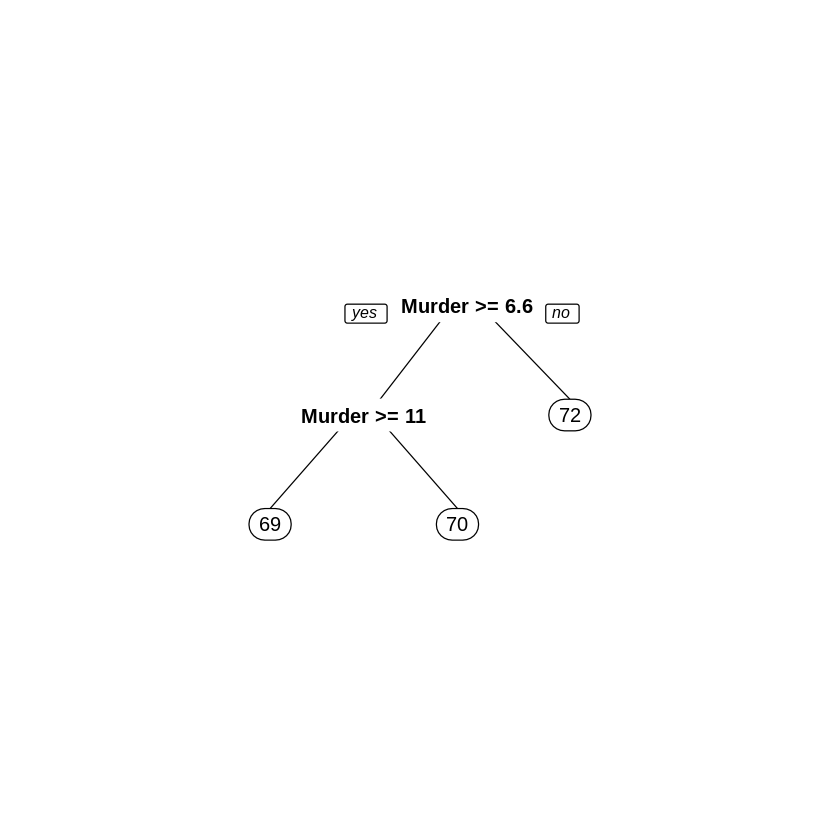

In [12]:
modelCart3  <- rpart(Life.Exp ~ ., data = statedata, cp=0.12)
prp(modelCart3)
6.6

#### and is less than
11

# Problem 3.3 - Cross-Validation
#### Calculate the SSE of this tree:

In [13]:
predictCart4 <- predict(modelCart3)
(SSE <- sum((predictCart4 - statedata$Life.Exp)^2))

[1] 32.86549

# Problem 3.4 - Cross-Validation
#### Recall the first tree (default parameters), second tree (minbucket = 5), and the third tree (selected with cross validation) we made. Given what you have learned about cross-validation, which of the three models would you expect to be better if we did use it for prediction on a test set? For this question, suppose we had actually set aside a few obseThe best model in this whole question is the first "Area tree" because it had the lowest SSE.
&nbsp;The Area variable is not as predictive as Murder rate.
&nbsp;Cross-validation is intended to decrease the SSE for a model on the training data, compared to a tree that isn't cross-validated.
&nbsp;Cross-validation will always improve the SSE of a model on unseen data, compared to a tree that isn't cross-validated.rvations (states) in a test set, and we want to make predictions on those states.
- <font color='red'>The first model</font><br>
- <font color='red'>The second model</font><br>
- <font color='red'>The model we just made with the "best" cp</font> # Correct <br>

# Problem 3.5 - Cross-Validation
#### At the end of Problem 2 we made a very complex tree using just Area. Use train with the same parameters as before but just using Area as an independent variable to find the best cp value (set the seed to 111 first). Then build a new tree using just Area and this value of cp.
#### How many splits does the tree have?

In [14]:
set.seed(111)
numFolds = trainControl( method = "cv", number = 10 )
cpGrid = expand.grid( .cp = seq(0.01,0.5,0.01)) 
train(Life.Exp ~ Area, data=statedata, method = "rpart", 
      trControl = numFolds, tuneGrid = cpGrid)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

CART 

50 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 46, 45, 44, 43, 46, 46, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared    MAE     
  0.01  1.231586  0.39845523  1.006585
  0.02  1.243748  0.38909431  1.016449
  0.03  1.243748  0.38909431  1.016449
  0.04  1.246020  0.38659302  1.020503
  0.05  1.246020  0.38659302  1.020503
  0.06  1.257693  0.38542329  1.028342
  0.07  1.284635  0.37765344  1.063739
  0.08  1.295051  0.36309730  1.080484
  0.09  1.295051  0.36309730  1.080484
  0.10  1.295051  0.36309730  1.080484
  0.11  1.393421  0.26634509  1.155116
  0.12  1.393421  0.26634509  1.155116
  0.13  1.393421  0.26634509  1.155116
  0.14  1.408479  0.20191108  1.177991
  0.15  1.391087  0.23690897  1.190359
  0.16  1.391087  0.23690897  1.190359
  0.17  1.368303  0.08957212  1.147769
  0.18  1.369533  0.01795209  1.142731
  0.19  1.356254  0.01795209  1.131768
  0.20  1.328025         NaN  1

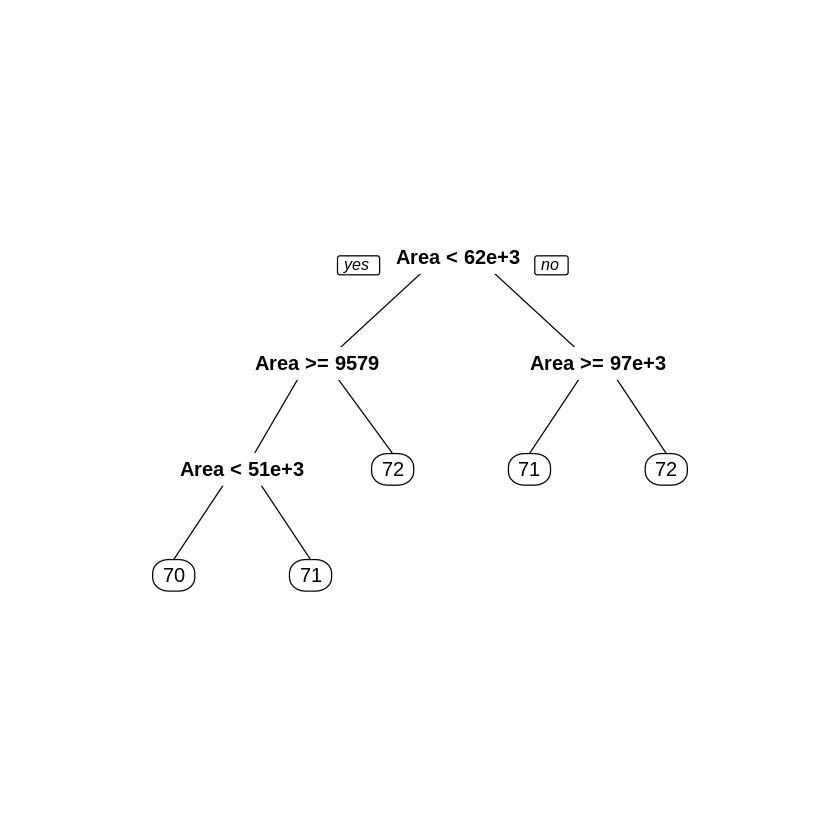

In [15]:
modelCart5 <- rpart(Life.Exp ~ Area, data=statedata, cp = 0.01)
prp(modelCart5)

# Problem 3.6 - Cross-Validation
#### The lower left leaf (or bucket) corresponds to the lowest predicted Life.Exp of 70. Observations in this leaf correspond to states with area greater than or equal to

In [16]:
9579

[1] 9579

#### and area less than

In [17]:
51e+3

[1] 51000

# Problem 3.7 - Cross-Validation
#### We have simplified the previous "Area tree" considerably by using cross-validation. Calculate the SSE of the cross-validated "Area tree", and select all of the following correct statements that apply:
- <font color='red'>The best model in this whole question is the first "Area tree" because it had the lowest SSE.</font><br>
- <font color='red'>The Area variable is not as predictive as Murder rate.</font> # Correct <br>
- <font color='red'>Cross-validation is intended to decrease the SSE for a model on the training data, compared to a tree that isn't cross-validated.</font><br>
- <font color='red'>Cross-validation will always improve the SSE of a model on unseen data, compared to a tree that isn't cross-validated.</font><br>

In [18]:
predictionCart5 <- predict(modelCart5)
(SSE <- sum((predictionCart5 - statedata$Life.Exp)^2))

[1] 44.26817